In [1]:
# import standardowych biblotek: Numpy, Pandas, Matplotlib (z magic function)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#np.random.seed(0) 
''' jeśli w generatorze liczb losowych ustawimy ziarno na daną wartośći,
będzie wtedy losował takie same liczby po kolei za każdym razem '''

# import bibliiotek kerasowych
from keras.datasets import mnist # zestaw obrazów MNIST
from keras.models import Sequential # biblioteka do budowy warstwowej sieci neuronowej, jaką jest CNN
# warstwy, z których będzie składała się CNN:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D 
from keras.preprocessing import image # biblioteka do preprocessingu obrazów
from keras.utils import to_categorical # biblioteka do zamiany typu danych na kategorialne
from sklearn.model_selection import train_test_split

# instalacja i import bibliotek do oceny dokładności rozwiązania
!pip install livelossplot
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback


# instalacja bibliotek do wczytania obrazów
import requests
from io import BytesIO
from PIL import Image

Using TensorFlow backend.


In [2]:
X = np.load("nist_images_28x28.npy")
y = np.load("nist_labels_28x28vol2.npy")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
print('X_train.shape:', X_train.shape)
print('y_train.shape:',y_train.shape)

X_train.shape: (154593, 28, 28)
y_train.shape: (154593,)


In [5]:
print('X_train.shape:',X_train.shape, ' X_test.shape:',X_test.shape) # zaimportowano 60 000 zdjęć  
#o rozmiarze 28x28 pix do zbioru treningowego i 10 000 zdjęć do zbioru testowego
print('y_train.shape:',y_train.shape, ' y_test.shape:',y_test.shape)

X_train.shape: (154593, 28, 28)  X_test.shape: (38649, 28, 28)
y_train.shape: (154593,)  y_test.shape: (38649,)


In [6]:
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
print('img_rows:',img_rows, 'img_cols:',img_cols)

img_rows: 28 img_cols: 28


In [7]:
# Zmiana wymiarów macierzy X - reshape i nadpisanie wyników
X_train = X_train.reshape(-1, img_rows, img_cols, 1 ) #-1: przepisuje dany nr zdjęcia, 28x28 są stałe, 
#można je przepisać, 1: dodany wymiar
X_test = X_test.reshape(-1, img_rows, img_cols, 1 )

input_shape = (img_rows, img_cols, 1)

print('X_train.shape:',X_train.shape, ' X_test.shape:',X_test.shape)

X_train.shape: (154593, 28, 28, 1)  X_test.shape: (38649, 28, 28, 1)


In [8]:
if np.max (X_train) > 1: 
  X_train = X_train / 255
  
if np.max (X_test) > 1: 
  X_test = X_test / 255  

In [9]:
# realizacja pętli: jeżeli długość wektora y jest równa 1 to:  skategoryzuj wektory wg numeru klasy
if len(y_train.shape)== 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [10]:
print('y_train.shape:',y_train.shape, 'y_test.shape:',y_test.shape)
print(y_train[5])

y_train.shape: (154593, 62) y_test.shape: (38649, 62)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Badanie struktur sieci

In [ ]:
# pierwsza architektura sieci
def arch_01():
    
    return Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')]) 
  
model = arch_01()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# uruchomienie modelu
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesCallback()]
)

In [ ]:
# druga architektura sieci
def arch02():
    return Sequential([
        
        Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = input_shape),
        MaxPool2D(pool_size = (2, 2)),
        
        Conv2D(filters =512, kernel_size = (3,3), activation = 'relu'),
        MaxPool2D(pool_size = (2, 2)),
        
        Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
        MaxPool2D(pool_size = (2, 2)),
               
        Dropout(0.2),
        Flatten(),
       
        Dense(4096, activation='relu'),
        Dense(2048, activation='relu'),
        Dense(num_classes, activation='softmax')])


model = arch_02()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
#uruchomienie modelu
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesCallback()]
)

In [ ]:
 #trzecia architektura sieci
def arch_03():
    return Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')]) 
  
model = arch_03()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# uruchomienie modelu
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesCallback()]
)

In [11]:
def arch_04():  #optymalizator SGD
 
  return Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),

        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')]) 

model = arch_04()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 128)         0         
____________________

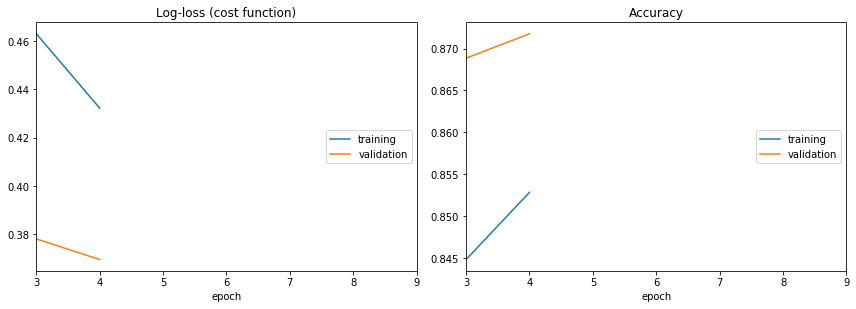

Log-loss (cost function):
training   (min:    0.432, max:    1.009, cur:    0.432)
validation (min:    0.370, max:    0.457, cur:    0.370)

Accuracy:
training   (min:    0.711, max:    0.853, cur:    0.853)
validation (min:    0.848, max:    0.872, cur:    0.872)
Epoch 5/9
 58624/154593 [==========>...................] - ETA: 3:31 - loss: 0.4078 - acc: 0.8589

KeyboardInterrupt: 

In [12]:
#uruchomienie modelu
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=9,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesCallback()]
)

### BADANIE OPTYMALIZATORÓW

In [ ]:
def arch_04():  #optymalizator Adam
 
  return Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),

        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')]) 

model = arch_04()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
#uruchomienie modelu
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=9,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesCallback()]
)

In [ ]:
def arch_04(): # optymlizator AdaGrad
 
  return Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),

        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')]) 

model = arch_04()
model.compile(loss='categorical_crossentropy',optimizer='AdaGrad', metrics=['accuracy'])
model.summary()

In [ ]:
#uruchomienie modelu
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=9,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesCallback()]
)

In [ ]:
def arch_04():    #Optymalizator RMSprop
 
  return Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),

        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')]) 

model = arch_04()
model.compile(loss='categorical_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
model.summary()

In [ ]:
#uruchomienie modelu
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=9,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesCallback()]
)

In [11]:
def arch_04():  #optymalizator SGD
 
  return Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),

        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')]) 

model = arch_04()
model.compile(loss='categorical_crossentropy',optimizer='SGD', metrics=['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 128)         0         
____________________

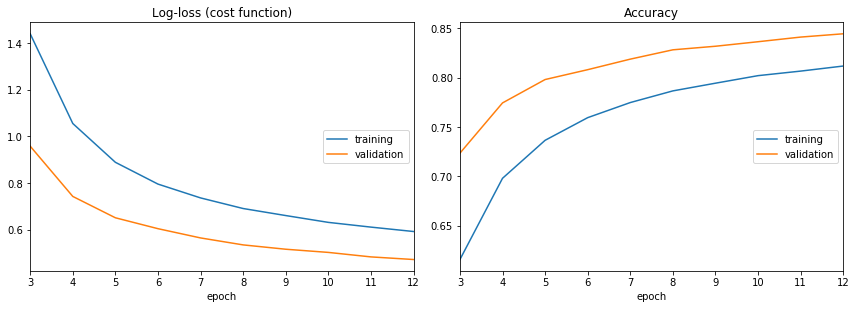

Log-loss (cost function):
training   (min:    0.592, max:    3.726, cur:    0.592)
validation (min:    0.472, max:    3.536, cur:    0.472)

Accuracy:
training   (min:    0.072, max:    0.812, cur:    0.812)
validation (min:    0.231, max:    0.844, cur:    0.844)


In [12]:
#uruchomienie modelu
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=12,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesCallback()]
)

In [13]:
# Badania przeprowadzono osobno dla cyfr i liter
X_cyfry = np.load('D:/inzynier/klasy/y_testCyfry.npy')
y_cyfry = np.load('D:/inzynier/klasy/X_testCyfry.npy')
X_litery = np.load('D:/inzynier/klasy/y_testLitery.npy')
y_litery = np.load('D:/inzynier/klasy/X_testLitery.npy')

In [14]:
img_rows, img_cols = X_cyfry.shape[1],X_cyfry.shape[2]
print('img_rows:',img_rows, 'img_cols:',img_cols)
X_cyfry = X_cyfry.reshape(-1, img_rows, img_cols, 1 ) 
input_shape = (img_rows, img_cols, 1)
if np.max (X_cyfry) > 1: 
    X_cyfry = X_cyfry / 255
if len(y_cyfry.shape)== 1:
    num_classes = 62
    y_cyfry = to_categorical(y_cyfry, num_classes)
print('X_cyfry.shape:',X_cyfry.shape, ' y_cyfry.shape:',y_cyfry.shape)

img_rows: 28 img_cols: 28
X_cyfry.shape: (520, 28, 28, 1)  y_cyfry.shape: (520, 62)


In [15]:
img_rows, img_cols = X_litery.shape[1],X_litery.shape[2]
print('img_rows:',img_rows, 'img_cols:',img_cols)
X_litery = X_litery.reshape(-1, img_rows, img_cols, 1 ) 
input_shape = (img_rows, img_cols, 1)
if np.max (X_litery) > 1: 
    X_litery = X_litery / 255
if len(y_litery.shape)== 1:
    num_classes = 62
    y_litery = to_categorical(y_litery, num_classes)
print('X_litery.shape:',X_litery.shape, ' y_litery.shape:',y_litery.shape)

img_rows: 28 img_cols: 28
X_litery.shape: (641, 28, 28, 1)  y_litery.shape: (641, 62)


In [17]:
prediction_list_cyfry = []
class_list_cyfry = []
#start = time.clock()
for i in range(X_cyfry.shape[0]):
    prediction_cyfry = model.predict(np.expand_dims(X_cyfry[i], axis=0))
    klasa_cyfry=prediction_cyfry.argmax()

    prediction_list_cyfry.append(prediction_cyfry)
    class_list_cyfry.append(klasa_cyfry)
#stop = time.clock()

In [18]:
prediction_list_litery = []
class_list_litery = []
#start = time.clock()
for i in range(X_litery.shape[0]):
    prediction_litery = model.predict(np.expand_dims(X_litery[i], axis=0))
    klasa_litery=prediction_litery.argmax()

    prediction_list_litery.append(prediction_litery)
    class_list_litery.append(klasa_litery)
#stop = time.clock()

In [19]:
y_pred_cyfry=np.array(class_list_cyfry)
y_pred_litery=np.array(class_list_litery)
(y_pred_cyfry.shape, y_pred_cyfry.shape)

((520,), (520,))

In [21]:
y_pred_litery[150:170]

array([39, 39,  2,  4,  4, 39, 39, 39, 39,  9,  0,  0,  0, 39,  0, 39, 39,
       36,  4,  4], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [27]:
if len(y_pred_cyfry.shape)== 1:     # realizacja pętli: jeżeli długość wektora y_pred jest równa 1 to:  skategoryzuj wektory wg numeru klasy
    num_classes = 62 
    y_pred_cyfry = to_categorical(y_pred_cyfry, num_classes)

In [30]:
print('F1',f1_score(y_cyfry, y_pred_cyfry, average = 'weighted'))   #obliczanie błędów: F1, precyzja, acc, recall
print('precyzja',precision_score(y_cyfry,y_pred_cyfry, average='weighted'))
print('acc',accuracy_score(y_cyfry, y_pred_cyfry))
print('recall', recall_score(y_cyfry, y_pred_cyfry, average='weighted'))

F1 0.820830503984328
precyzja 0.8688971821186235
acc 0.7942307692307692
recall 0.7942307692307692


C:\Users\Maja\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [31]:
if len(y_pred_litery.shape)== 1:     # realizacja pętli: jeżeli długość wektora y_pred jest równa 1 to:  skategoryzuj wektory wg numeru klasy
    num_classes = 62 
    y_pred_litery = to_categorical(y_pred_litery, num_classes)

In [32]:
print('F1',f1_score(y_litery, y_pred_litery, average = 'weighted'))   #obliczanie błędów: F1, precyzja, acc, recall
print('precyzja',precision_score(y_litery,y_pred_litery, average='weighted'))
print('acc',accuracy_score(y_litery, y_pred_litery))
print('recall', recall_score(y_litery, y_pred_litery, average='weighted'))

F1 0.34122225737406875
precyzja 0.633244217825385
acc 0.2839313572542902
recall 0.2839313572542902
